# Lagrange's, Newton's Interpolation and a Cubic Spline
In this notebook we are trying to "guess" a function that pass through some given points
$(x_i, f(x_i))$ $i = 1, ..., m$

So, we will approximate this by two methods, first we will use Newton's interpolation, it could be donde with lagrange's interpolation aswell.

## Newton's Interpolation.

We will create a polynomial function $p(x)$ such that it satisfies $p(x_i) = f(x_i)$.

We will continue with an inductive method, we will show that interpolation polynomial is given by : $$p_n(x) = p_{n-1} + C\Pi_{i=0}^{n-1}(x-x_i)$$ where $C = \frac{y_{n} - p_{n-1}(x_{n})}{\Pi_{i=0}^{n-1}({x_{n}-x_i})}$

- for $m = 1$
    in this case we have two points, $(x_0,f(x_0) = y_0),(x_1,f(x_1)=y_1)$ in this case the solutions is pretty obvious, we just choose the line that satisfies the given conditions. $p_1(x) = y_0 + \frac{y_1-y_0}{x_1-x_0}(x-x_0) $ 
- Now is our inductive step, we suppose that is true for $m = n$ $p_n(x) = p_{n-1} + C\Pi_{i=0}^{n-1}(x-x_i)$ where $C = \frac{y_{n} - p_{n-1}(x_{n})}{\Pi_{i=0}^{n-1}({x_{n}-x_i})}$  in our first case we choose $p_0(x)=y_0$ and we will have the same expression
- Now we prove for $m = n +1$ we will show that $p_{n+1}$ interpolates $x_i$ i,e $p_{n+1}(x_{n+1})=y_{n+1}$ we can see that when $x = x_{n+1}$ we have $p_{n+1}(x_{n+1}) = p_{n}(x_{n+1}) = \frac{y_{n+1}-p_n(x_{n+1}}{\Pi_{i=0}^{n}(x_{n+1}-x_i}\Pi_{i=0}^{n}(x_{n+1}-x_{i})  = p_{n}(x_{n+1})+y_{n+1}-p_{m}(x_{n+1})=y_{n+1} $
it finishes the proof.

Our next goal is to implement Newton's Interpolation.

In [2]:
from matplotlib import pyplot as plt
import numpy as np

We will load the data into a mx2 matrix, we will find our vectors $X,Y$, we will construct our polynomial with a technique called divided differences, for this we will use two auxiliar vectors $u,v$

In [3]:
XY = np.loadtxt("datos.txt")
Y = XY[:,1]
X = XY[:,0]
u = np.array(Y)
v = np.zeros(len(Y))
coeff = np.zeros(len(Y))
coeff[0] = Y[0]
size = len(Y)
for j in range(1, size):
    for i in range(j, size):
        v[i] = u[i] - u[i-1]
        v[i] = v[i] / (X[i] - X[i - j])
    u = np.copy(v)   
    coeff[j] = v[j]

In the cell above, we calculated the diagonal of the divided differences table, we will use that to evaluate our polynomial with a function.

In [4]:
def eval(coef, X, x):
    sz = len(coef)
    y = 1 * coef[0]
    for i in range(1,sz):
        z = 1 * coef[i]
        for j in range(0, i):
            z = np.multiply(z, (x-X[j]))
        y = y + z
    return y
    

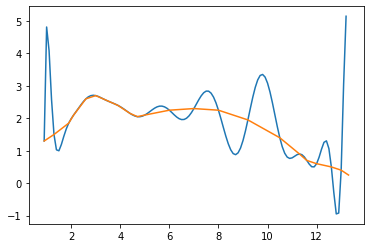

In [5]:
x = np.arange(0.9,13.3, step=0.1)
graph = eval(coeff, X, x)
plt.plot(x,graph)
plt.plot(X,Y)

now in the cell above we have our interpolation polynomial, let's compare with straigth line.


## Cubic spline
Now our next goal is to solve the same problem but with a different technique, the key idea of a spline is to think of it as divided by parts, if we can figure out how to mix this different parts in such way that we have some important properties like continuity and differentiability.
We can do this in a broad sense just interpolating every pair of points with a polynomial and try to adjust some parameters such that the resulting function is continious and differentiable.
We will not go deep into the theory of how to construct the spline because is it not our main goal in this notebook. So by imposing some conditions and solving the given constraints we can find that our spline is:
$$S_i(x) = \frac{z_{i+1}}{6}\frac{(x-x_{i})^3}{x_{i+1}-x_i} + (\frac{f_{i+1}}{x_{i+1}-x{i}}-\frac{z_{i+1}(x_{i+1}-x_i)}{6})(x_{i+1}-x) + \frac{z_{i}(x_{i+1}-x)^3}{x_{i+1}-x_{i}}+(\frac{f_i}{x_{i+1}-x_{i}}-\frac{z_i(x_{i+1}-x_{i}}{y})(x_{i+1}-x)$$ where $z_i$ are constants that we need determine by imposing the called "natural codition of the spline". The next recurrence can be derived $h_{i-1}z_{i-1}+u_{i}z_{i}+h_{i}z_{i+1}$ where $h_{i} = x_{i+1}-x_{i}$ , $u_{i}=2(h_{i-1}+h_{i})$, $v_{i}=6(b_{i}-b_{i-1})$ and finally $b_{i}=\frac{f_{i+1}-f_{i}}{x_{i+1}-x_{i}}$
this system can be solved with a gaussian elimination method.
$u_{i} \rightarrow u_{i}-\frac{h_{i-1}^2}{u_{i-1}}$, $v_{i} \rightarrow v_{i}-\frac{h_{i-1}v_{i-1}}{u_{i-1}}$ $i = 2,3,...,n-1$ and $z_{n-1} \rightarrow \frac{v_{n-1}}{u_{n-1}}$ and $z_{i} \rightarrow \frac{v_{i}-h_{i}z_{i+1}}{u_{i}} $ $i = n-2, n-3, ..., 1$
lets construct this.

In [6]:
def cubSpline(XY):
    X = XY[:, 0]
    Y = XY[:, 1]
    sz = len(Y)
    b = np.zeros(sz)
    h = np.zeros(sz)
    u = np.zeros(sz)
    v = np.zeros(sz)
    z = np.zeros(sz)
    spline = np.zeros((sz - 1, 4))
    print(h)
    for i in range(0, sz - 1):
        h[i] = (X[i + 1] - X[i])
        b[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])   
    u[1] = 2*(h[0] + h[1])
    v[1] = 6*(b[1] - b[0])
    for i in range(2, sz - 1):
        u[i] = 2 * (h[i - 1] + h[i]) - (h[i - 1] * h[i - 1]) / u[i - 1]
        v[i] = 6 * (b[i] - b[i - 1]) - (h[i - 1]*v[i - 1]) / u[i - 1]
    z[sz - 1] = 0
    for i in range(sz - 2, 0, -1):
        z[i] = (v[i] - h[i]*z[i+1]) / u[i]
    for i in range(0, sz - 1):
        dx = X[i + 1] - X[i]
        spline[i, 0] = z[i + 1] / (6 * dx)
        spline[i, 1] = (Y[i + 1] / dx) - (z[i + 1] * dx) / 6
        spline[i, 2] = z[i] / (6 * dx)
        spline[i, 3] = Y[i] / dx - (z[i] * dx) / 6
    return spline


The next step is to create a function that can evaluate our spline.


In [7]:
def EvalSpline(Spline, k, X, x):
    f = Spline[k, 0] * np.power((x - X[k]), 3)
    f = f + Spline[k, 1] * (x - X[k])
    f = f + Spline[k, 2] * np.power((X[k + 1] - x), 3)
    f = f + Spline[k, 3] * np.power((X[k + 1] - x), 1)
    return f

Now is time to plot our results

we can see that with this method we have way better results than solving it with newtons interpolation, but now this points are not just points they have a shape of a duck,  lets add the inferior part.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


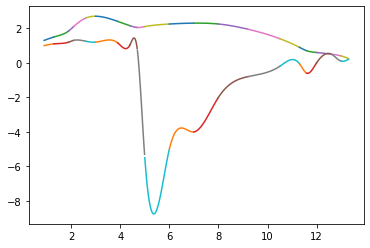

In [17]:
XY2 = np.loadtxt("inf.txt")
X2 = XY2[:,0]
Y2 = XY2[:,1]
spline2 = cubSpline(XY2)
for i in range(0, size - 1):
    x = np.arange(X[i], X[i + 1], step=0.01)
    graph = EvalSpline(spline,i,X,x)
    graph2 = EvalSpline(spline2, i, X, x)
    plt.plot(x,graph)
    plt.plot(x,graph2)

This is our final result :), we could have better results if we choose more carefully the points